In [1]:
##########################################################################
# Created on Sat Otc 31 16:19:45 2021                                    #
# Python for Financial Analysis and Risk Management                      #
# @author: Meng Lipeng (FRM, CFA)                                        #
##########################################################################

# 6.3.1.Relativity of IR

In [4]:
par=1e4
r=0.02
M=[1,2,4,12,52,365] #Compound frequency
name=['once per year','once per semi-year','once per quarter','once per month','once per week','once per day']

value=[]
i=0

for m in M:
    value.append(par*(1+r/m)**m)
    print(name[i],'FV',round(value[i],2))
    i=i+1

once per year FV 10200.0
once per semi-year FV 10201.0
once per quarter FV 10201.51
once per month FV 10201.84
once per week FV 10201.97
once per day FV 10202.01


$FV = A(1+\frac{R}{m})^{mn}$

In [5]:
def FV(A,n,R,m):
    '''Define a function used for calculate FV under different compound frequency
    A: Initial amount
    n: Investment tenor(year)
    R: Yield(year)
    m: Compound frequency(
       'Y':once per year
       'S':once per semi-year
       'Q':once per quarter
       'M':once per month
       'W':once per week
       'D':once per day)'''
    if m=='Y':
        value=A*pow(1+R,n)
    elif m=='S':
        value=A*pow(1+R/2,n*2)
    elif m=='Q':
        value=A*pow(1+R/4,n*4)
    elif m=='M':
        value=A*pow(1+R/12,n*12)
    elif m=='W':
        value=A*pow(1+R/52,n*52)
    else:
        value=A*pow(1+R/365,n*365)
    return value

In [6]:
N=1
FV_week=FV(A=par,n=N,R=r,m='W')
print('FV(once per week) ',round(FV_week,2))

FV(once per week)  10201.97


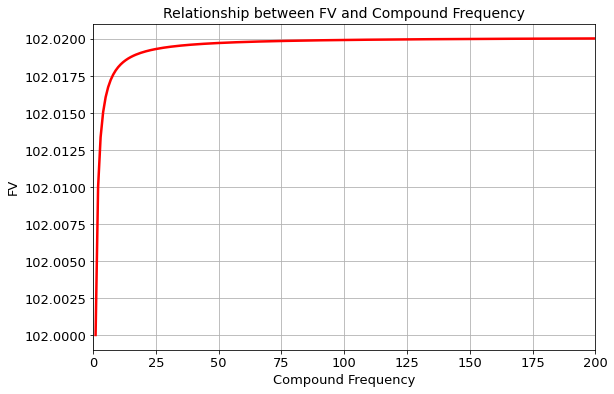

In [8]:
import numpy as np
import matplotlib.pyplot as plt

par_new=100
M_list=np.arange(1,201)
Value_list=par_new*pow(1+r/M_list,M_list)

plt.figure(figsize=(9,6))
plt.plot(M_list,Value_list,'r-',lw=2.5)
plt.xticks(fontsize=13)
plt.xlim(0,200)
plt.xlabel('Compound Frequency',fontsize=13)
plt.yticks(fontsize=13)
plt.ylabel('FV',fontsize=13)
plt.title('Relationship between FV and Compound Frequency',fontsize=14)
plt.grid()
plt.show()

## Continuous compounding

$$
FV = \lim_{m\to+\infty}A(1+\frac{R}{m})^{mn}=Ae^{Rn}
$$

# 6.3.2.Equivalence of IR

## Relationship 1

$R_2=m_2[(1+\frac{R_1}{m_1})^{\frac{m_1}{m_2}}-1]$

In [14]:
def R_m2(R_m1,m1,m2):
    '''Define a function that when Rm1 and m1 frequency are known, calculate IR of m2 frequency
    R_m1: IR of m1 frequency
    m1: Compound frequency of R_m1
    m2: Compound frequency of R_m2'''
    r=m2*(pow(1+R_m1/m1,m1/m2)-1)
    return r

In [15]:
R_semiannual=0.03
m_semiannual=2
m_month=12

R_month=R_m2(R_m1=R_semiannual,m1=m_semiannual,m2=m_month)
print('Monthly compound IR is ',round(R_month,6))

Monthly compound IR is  0.029814


## Relationship 2

$R_c=m\times \ln(1+\frac{R_m}{m})$

$R_m=m(e^\frac{R_c}{m}-1)$

In [17]:
def Rc(Rm,m):
    '''Define a function that when Rm and m frequency are known, calculate continuous IR
    Rm: IR of m frequency
    m: Compound frequency'''
    r=m*np.log(1+Rm/m)
    return r

In [18]:
def Rm(Rc,m):
    '''Define a function that when continuous IR is known, calculate IR of m frequency
    Rc: Continuous compound IR
    m: Compound frequency'''
    r=m*(np.exp(Rc/m)-1)
    return r

In [19]:
R1=0.04
M1=4

R_c=Rc(R1,M1)
print('Continuous IR ',round(R_c,6))

Continuous IR  0.039801


In [20]:
R2=0.05
M2=12

R_m=Rm(R2,M2)
print('Monthly compound IR ', round(R_m,6))

Monthly compound IR  0.050104


# 6.3.3.Zero rate

In [21]:
R3=0.03
T=3

value_3y=FV(par,T,R3,'Y')
print('FV(after 3y) ',round(value_3y,2))

FV(after 3y)  10927.27
